In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [9]:
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [11]:
data = data.drop("customer_id" ,axis=1)

In [13]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
data['credit_score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

<Axes: >

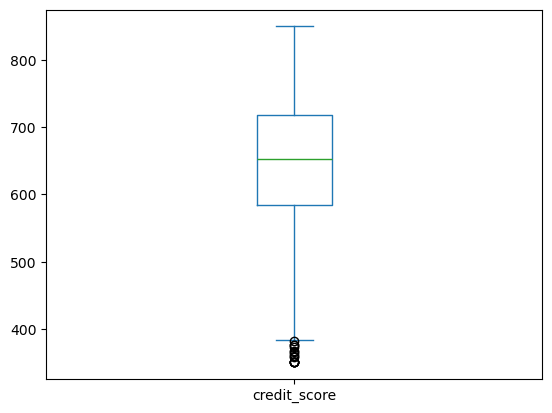

In [17]:
data['credit_score'].plot.box()

In [18]:
Q1 = data['credit_score'].quantile(0.25)  
Q3 = data['credit_score'].quantile(0.75)  
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR

In [19]:
#to replace outlier with median
median_value = data['credit_score'].median()
data.loc[data['credit_score'] < lower_bound , 'credit_score'] = median_value

<Axes: >

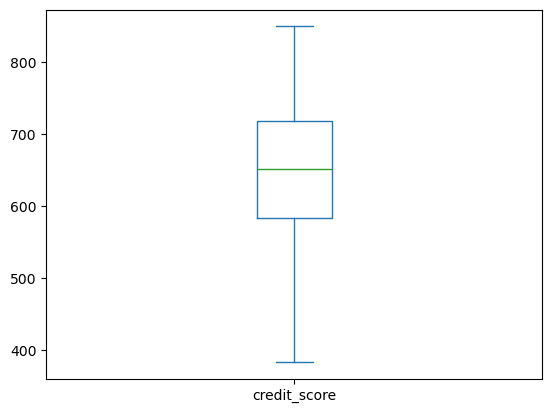

In [23]:
data['credit_score'].plot.box()

In [25]:
data['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

<Axes: >

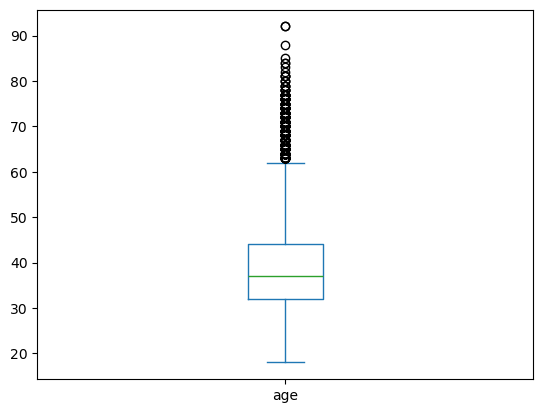

In [27]:
data['age'].plot.box()

In [29]:
Q1 = data['age'].quantile(0.25)  
Q3 = data['age'].quantile(0.75)  
IQR = Q3 - Q1  

upper_bound = Q3 + 1.5 * IQR

In [31]:
upper_bound

62.0

In [33]:
median_value = data['age'].median()
data.loc[data['age'] > upper_bound, 'age'] = data["age"].median()

<Axes: >

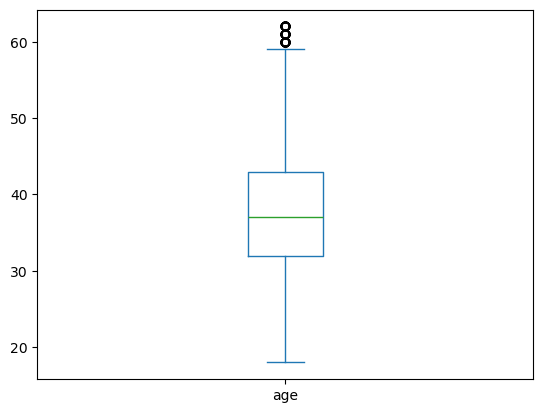

In [35]:
data['age'].plot.box()

In [37]:
data.tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

<Axes: >

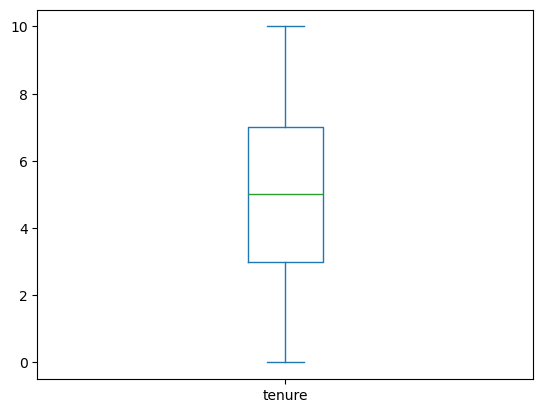

In [39]:
data.tenure.plot.box()

In [41]:
data.products_number.describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: products_number, dtype: float64

<Axes: >

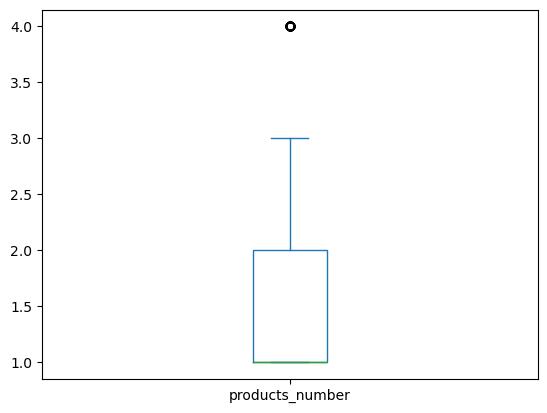

In [43]:
data.products_number.plot.box()

In [45]:
data.balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

<Axes: >

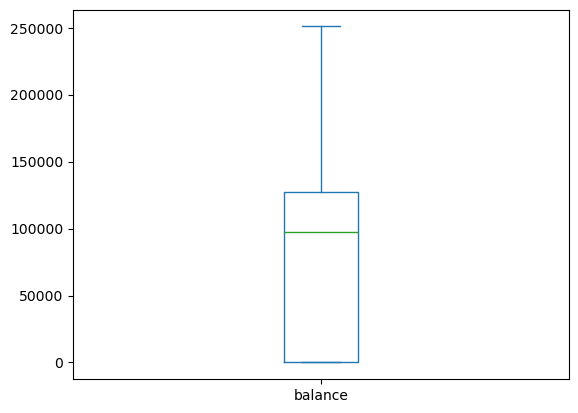

In [47]:
data.balance.plot.box()

In [49]:
data.estimated_salary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

<Axes: >

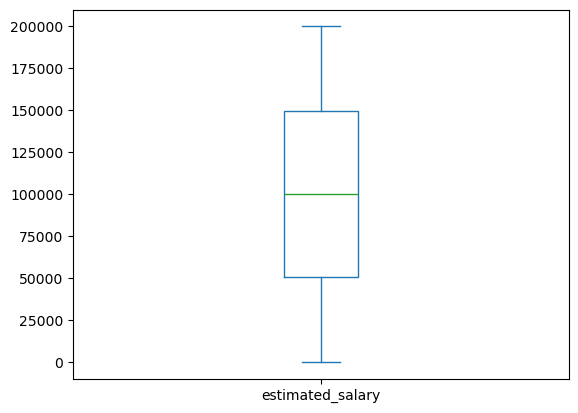

In [51]:
data.estimated_salary.plot.box()

In [53]:
#catagorical columns
data.country.value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [55]:
data.gender.value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [57]:
data.credit_card.value_counts()

credit_card
1    7055
0    2945
Name: count, dtype: int64

In [59]:
data.active_member.value_counts()

active_member
1    5151
0    4849
Name: count, dtype: int64

In [61]:
data.churn.value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [63]:
#drop columns that not predicted churn
data = data.drop(['gender','credit_card'] , axis=1)
data

,credit_score,country,age,tenure,balance,products_number,active_member,estimated_salary,churn
0,619,France,42,2,0.00,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,1,112542.58,0
2,502,France,42,8,159660.80,3,0,113931.57,1
3,699,France,39,1,0.00,2,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,0,96270.64,0
9996,516,France,35,10,57369.61,1,1,101699.77,0
9997,709,France,36,7,0.00,1,1,42085.58,1
9998,772,Germany,42,3,75075.31,2,0,92888.52,1


In [65]:
#relation between columns
pd.crosstab(data['country'], data['churn'], normalize="index") * 100

churn,0,1
country,,
France,83.845233,16.154767
Germany,67.556796,32.443204
Spain,83.326605,16.673395


C:\Users\GIGA\AppData\Local\Temp\ipykernel_3212\1542843102.py:5: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ct.plot(kind="bar", stacked=True, colormap="coolwarm" , color=['#89CFF0', '#FF9999'])
C:\Users\GIGA\AppData\Local\Temp\ipykernel_3212\1542843102.py:5: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ct.plot(kind="bar", stacked=True, colormap="coolwarm" , color=['#89CFF0', '#FF9999'])


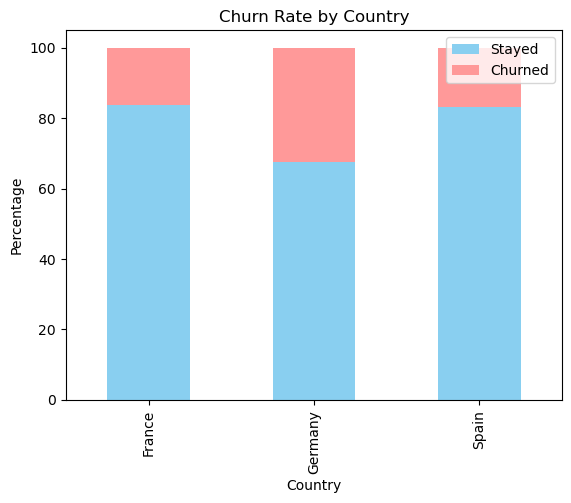

In [67]:

import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(data['country'], data['churn'], normalize="index") * 100
ct.plot(kind="bar", stacked=True, colormap="coolwarm" , color=['#89CFF0', '#FF9999'])

plt.title("Churn Rate by Country")
plt.ylabel("Percentage")
plt.xlabel("Country")
plt.legend(["Stayed", "Churned"])
plt.show()


In [68]:
data.groupby('churn')['age'].mean()

churn
0    36.222780
1    43.785469
Name: age, dtype: float64

C:\Users\GIGA\AppData\Local\Temp\ipykernel_3212\2052043111.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['churn'] == 0]['age'], label="Stayed", shade=True, color="blue")
C:\Users\GIGA\AppData\Local\Temp\ipykernel_3212\2052043111.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['churn'] == 1]['age'], label="Churned", shade=True, color="red")


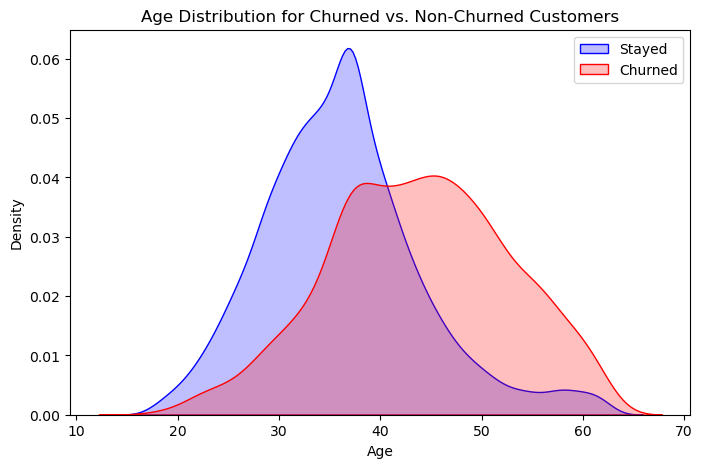

In [69]:
plt.figure(figsize=(8,5))
sns.kdeplot(data[data['churn'] == 0]['age'], label="Stayed", shade=True, color="blue")
sns.kdeplot(data[data['churn'] == 1]['age'], label="Churned", shade=True, color="red")

plt.title("Age Distribution for Churned vs. Non-Churned Customers")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


In [70]:
data.groupby('churn')['balance'].mean()

churn
0    72745.296779
1    91108.539337
Name: balance, dtype: float64

C:\Users\GIGA\AppData\Local\Temp\ipykernel_3212\3511716229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y="balance", data=data, palette="coolwarm")


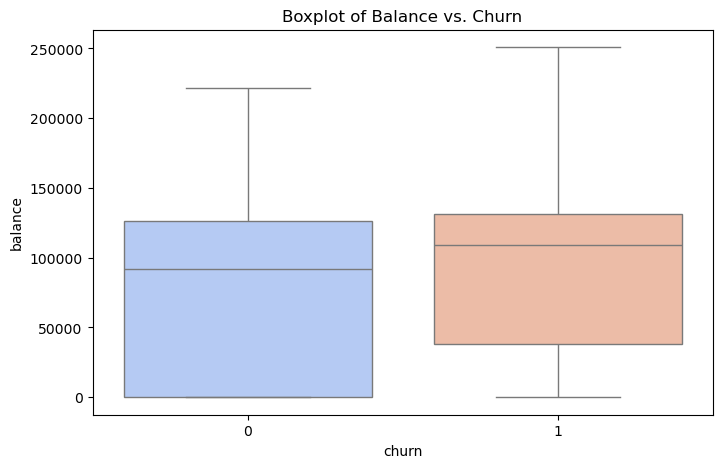

In [73]:
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="balance", data=data, palette="coolwarm")
plt.title("Boxplot of Balance vs. Churn")
plt.show()

In [76]:
avg_tenure=data.groupby('churn')['tenure'].mean()

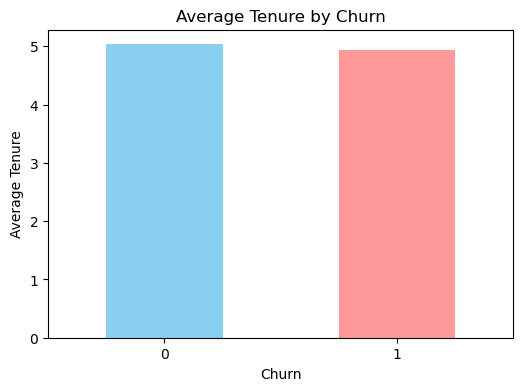

In [81]:
# Plotting
plt.figure(figsize=(6,4))
avg_tenure.plot(kind='bar', color=['#89CFF0', '#FF9999'])

# Labels and title
plt.xlabel("Churn")
plt.ylabel("Average Tenure")
plt.title("Average Tenure by Churn")
plt.xticks(rotation=0)  # Keeps x-axis labels readable

# Show the plot
plt.show()

In [83]:
data.groupby('churn')['estimated_salary'].mean()

churn
0     99738.391772
1    101465.677531
Name: estimated_salary, dtype: float64

In [85]:
pd.crosstab(data['active_member'] , data['churn'])

churn,0,1
active_member,,
0,3547,1302
1,4416,735


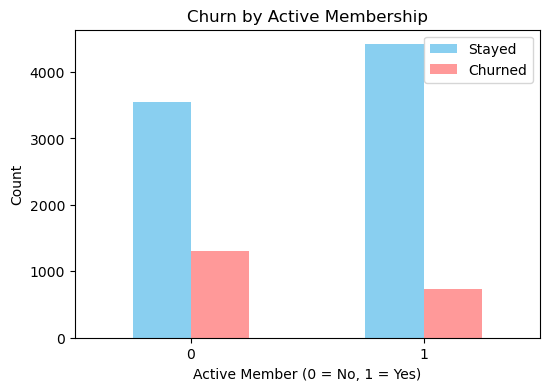

In [87]:
pd.crosstab(data['active_member'] , data['churn']).plot(kind="bar", figsize=(6,4), color=["#89CFF0", "#FF9999"])
plt.title("Churn by Active Membership")
plt.xlabel("Active Member (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(["Stayed", "Churned"])
plt.show()


<Axes: >

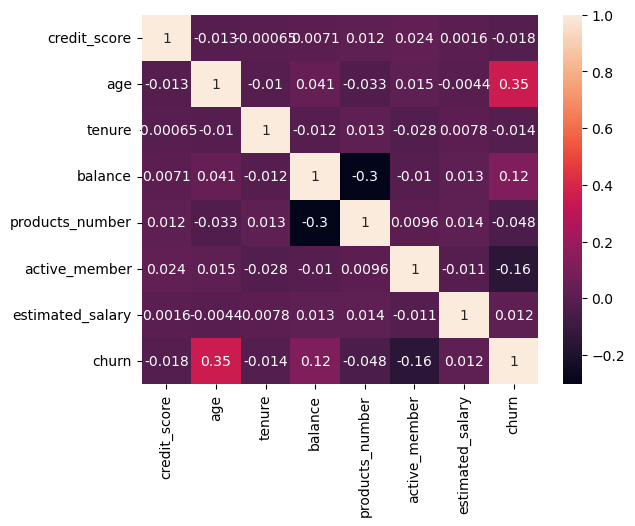

In [89]:
#check relationship between columns greater than 90%
import seaborn as sns 
sns.heatmap(data.corr(numeric_only= True), annot = True )    